

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*


------

# Objective 

We are going to run a few experiments today

- Train a model with and without normalized data and investigate the weight values and learning outcomes
- Train a model with varying values for batch_size, learning_rate, and optimizers

We are essentially running mannual gridsearches on our models. In module 3, we'll learn a few different ways to automate gridseach for deep learning. 

In [1]:
import os
import datetime
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, ReLU
from sklearn.model_selection import train_test_split

from keras.optimizers import Adam, SGD
from keras.activations import relu
from tensorflow.keras.callbacks import TensorBoard

In [2]:
%matplotlib inline
%load_ext tensorboard

### Load data

- Don't normalize your data just yet!

In [3]:
def load_quickdraw10():
    """
    Extracts and loads the quickdraw10 Neural Network practice dataset and splits it into training and testing data. 
    """
    
    URL_ = "https://github.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/quickdraw10.npz?raw=true"
    
    path_to_zip = tf.keras.utils.get_file('../quickdraw10.npz', origin=URL_, extract=False)

    data = np.load(path_to_zip)

    X = data['arr_0']
    Y = data['arr_1']
        
    return train_test_split(X, Y, shuffle=True)

In [4]:
X_train, X_test, y_train, y_test = load_quickdraw10()

In [5]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

75000 25000 75000 25000


----
### Write a Model Function
- Write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. 

Your function `create_model` should accept the following parameters

- Learning Rate `lr`
- Optimizer `opt`


Build a model with the following architecture and parameter values

- Use `1 hidden layer` 
- Use `sigmoid` activation function in hidden layer
- Use `250 nodes` in hidden layer 
- Use `10 nodes` in output layer
- Use `softmax` activation fucntion in output layer
- Use `sparse_categorical_crossentropy` loss function
- Use `accuracy` as your metric 

We will use this function to build all the models that we'll need to run our experiments. 

In [6]:
def create_model(lr=.01, opt="adam"):
    """
    
    Build and returns a complies Keras model.  
    
    Parameters
    ----------
    lr: float
        Learing rate parameter used for Stocastic Gradient Descent 
        
    opt: string
        Name of optimizer to use
        Valid options are "adam" and "sgd"
        
    Returns
    -------
    model: keras object 
        A complied keras model 
    """

    if opt == "adam":
        opt = Adam(learning_rate=lr)
    elif opt == 'sgd':
        opt = SGD(learning_rate=lr)
    else:
        print ("{} is not a valid option. Defaulting to Adam optimizer".format(opt))
        opt = Adam(learning_rate=lr)

    opt = Adam()
    
    model = Sequential([
        Dense(64, activation="relu"),
        Dense(250, activation="sigmoid"),
        Dense(10, activation="softmax")
    ])
    
    model.compile(
        optimizer=opt,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    return model

In [7]:
model = create_model()

n_layers = len(model.get_config()["layers"])
n_layers

3

In [8]:
# a check on model architecture
n_layers = len(model.get_config()["layers"])
output_act_funct =  model.get_config()["layers"][-1]["config"]["activation"]

assert n_layers == 3, "You should have an input, one hidden, and an output layer"
assert output_act_funct == "softmax", "Output act funct should be softmax"

------

# Experiment #1: How does normalized input data affect our model's learning outcome?

In this experiment we are going to answer the above question by training identifical models on a normalized data set and on a non-normalized data set. 

Then we will 

- Analyze the trained weight values of our model 
- Plot

In [9]:
# Clear any logs from previous runs
!rm -rf ./logs/

### Fit Model on Non-Normalized data

In [10]:
# fit model on non-normalized data

now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"No_Normalization-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)

model = create_model(lr=.001, opt="adam")

flat_model = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          workers=-2, 
          epochs=10, 
          batch_size=32, 
          verbose=1, 
          callbacks=[tensorboard])

Epoch 1/10
2344/2344 [==============================] - 20s 8ms/step - loss: 1.0831 - accuracy: 0.6500 - val_loss: 0.7503 - val_accuracy: 0.7662
Epoch 2/10
2344/2344 [==============================] - 18s 8ms/step - loss: 0.7425 - accuracy: 0.7683 - val_loss: 0.7043 - val_accuracy: 0.7798
Epoch 3/10
2344/2344 [==============================] - 15s 7ms/step - loss: 0.6988 - accuracy: 0.7855 - val_loss: 0.6988 - val_accuracy: 0.7859
Epoch 4/10
2344/2344 [==============================] - 16s 7ms/step - loss: 0.6747 - accuracy: 0.7913 - val_loss: 0.6696 - val_accuracy: 0.7946
Epoch 5/10
2344/2344 [==============================] - 17s 7ms/step - loss: 0.6685 - accuracy: 0.7921 - val_loss: 0.6627 - val_accuracy: 0.7968
Epoch 6/10
2344/2344 [==============================] - 18s 8ms/step - loss: 0.6419 - accuracy: 0.8022 - val_loss: 0.6516 - val_accuracy: 0.8039
Epoch 7/10
2344/2344 [==============================] - 16s 7ms/step - loss: 0.6312 - accuracy: 0.8061 - val_loss: 0.6498 - val_ac

In [11]:
print(flat_model.history)

{'loss': [0.8785783052444458, 0.730019211769104, 0.6951911449432373, 0.6786448359489441, 0.6678853034973145, 0.6466047167778015, 0.6302534937858582, 0.6229027509689331, 0.6144528388977051, 0.6347092986106873], 'accuracy': [0.7240666747093201, 0.7734533548355103, 0.7857199907302856, 0.7897999882698059, 0.793066680431366, 0.8008933067321777, 0.8056133389472961, 0.8075600266456604, 0.8095466494560242, 0.8036666512489319], 'val_loss': [0.7502771615982056, 0.704256534576416, 0.6988232731819153, 0.6696386933326721, 0.6627263426780701, 0.6515923142433167, 0.649832010269165, 0.6222983598709106, 0.649700403213501, 0.6417588591575623], 'val_accuracy': [0.7662400007247925, 0.7798399925231934, 0.7859200239181519, 0.7945600152015686, 0.7968400120735168, 0.8039199709892273, 0.8006799817085266, 0.8108400106430054, 0.8008000254631042, 0.8050400018692017]}


---------

### Fit Model on Normalized data

In [12]:
# Normalize your training and test sets 
# save normalized data to X_train_scaled and X_test_scaled

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [13]:
# train model on normalized data

now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"Normalization-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)

norm_model = create_model(lr=.001, opt="adam")

n_model = norm_model.fit(X_train_scaled, y_train, 
                  validation_data=(X_test_scaled, y_test),
                  workers=-2, 
                  epochs=10, 
                  batch_size=32, 
                  verbose=1, 
                  callbacks=[tensorboard])

Epoch 1/10
2344/2344 [==============================] - 17s 7ms/step - loss: 0.9331 - accuracy: 0.7101 - val_loss: 0.5860 - val_accuracy: 0.8224
Epoch 2/10
2344/2344 [==============================] - 16s 7ms/step - loss: 0.5317 - accuracy: 0.8368 - val_loss: 0.5006 - val_accuracy: 0.8493
Epoch 3/10
2344/2344 [==============================] - 16s 7ms/step - loss: 0.4641 - accuracy: 0.8571 - val_loss: 0.4696 - val_accuracy: 0.8582
Epoch 4/10
2344/2344 [==============================] - 16s 7ms/step - loss: 0.4192 - accuracy: 0.8713 - val_loss: 0.4549 - val_accuracy: 0.8615
Epoch 5/10
2344/2344 [==============================] - 16s 7ms/step - loss: 0.3861 - accuracy: 0.8810 - val_loss: 0.4500 - val_accuracy: 0.8638
Epoch 6/10
2344/2344 [==============================] - 16s 7ms/step - loss: 0.3651 - accuracy: 0.8887 - val_loss: 0.4506 - val_accuracy: 0.8640
Epoch 7/10
2344/2344 [==============================] - 16s 7ms/step - loss: 0.3408 - accuracy: 0.8948 - val_loss: 0.4612 - val_ac

### Each layer is labeled

Take note of the label for each layer in the network. It is these labels that will help you identify the corresponding bias and weight distribtuions on tensorboard. 

Assuming that you've ran `create_model` 3 times: once for the model check, once to create `model`, and once to create `norm_model`:

The name of the layers for `model` should be 
- dense_2
- dense_3

The name of the layers for `norm_model` should be 
- dense_4
- dense_5


If you keep retraining one or both of these models, tensorflow will increment the integer used in the layer names.  But that doesn't really matter, just take notice of the layer names so you can find their corresponding bias and weight distribtuions in tensorboard.

**Protip:** If you want to reset the integer incrementation that tensorflow uses, you'll need to restart your notebook's kernal. 

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 250)               16250     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2510      
Total params: 69,000
Trainable params: 69,000
Non-trainable params: 0
_________________________________________________________________


In [15]:
norm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 250)               16250     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2510      
Total params: 69,000
Trainable params: 69,000
Non-trainable params: 0
_________________________________________________________________


### Tensorboard 

- Run the cell below to launch tensorboard 
- Click on the `SCALARS` tab to see plots that compare the loss and accuracy between the two models
- Cick on the `HISTOGRAMS` tab to see the distribution of the learned weights 

In [16]:
%tensorboard --logdir logs

### Tensorboard 

Check out the loss and accuracy plots on the `SCALARS` tab. 

What you should see is that the accuracy is much higher for the model that was given normalized data; conversely, the loss is much lower for the model that was given normalized data. 

Recall that what we are doing whenever training a model is adjusting the value of the bias and weights in each layer. For simplicity of analysis, we only trained two layers: a hidden layer and the output layer. 

Now click on the `HISTOGRAM` tab. 

You should see both of your model's layer names. 

### Hidden Layer Distributions

Collapse the charts that correspond to the output layer so only the distributions for the weights and bias in the hidden layer are showing. (i.e. Only expand `dense_2` and `dense_4`). 

Also don't be confused by the word `kernel`, that's just the word that Tensorflow uses instead of weights. So, to be clear, **the kernal distributions are the weight values.** 

The `bias` distributions are the bias values. 

You should see 10 distributions stacked next to each other, **one distribution per epoch.**

The distribuion in the far back corresponds to the weight values at epoch 1 (tensorflow starts the count at 0, like the index for a list). The distribution at the very front corresponds to the weight values at the 10th epoch (tensorflow indexing show 9 instead of 10).

Notice how the shape of the distribution changes accross epochs? That's because their **values are being updated via Gradient Descent.** 

The distributions that you see are direclty responsible for the validation accuracy of our models. The reason why they look different between the two models is because one model was given normalize data and one wasn't. So you can conclude that the weight distributions in `dense_4` produce a higher validation accuracy than the weight distributions in `dense_2`. 

Now it's time to analyze those weight values more closely. 

----------
### Analyze Weights in Each Layer

In [17]:
# get the final bias and weight matrices for model
layer = model.get_layer(name="dense_4")
bias, weights = layer.get_weights()

In [18]:
# get the final  value bias and weight magrices for norm_moel
layer2 = norm_model.get_layer(name="dense_7")
bias_norm, weights_norm = layer2.get_weights()

In [19]:
# this line of code should not throw an error if the number of weights is the same for the hidden layer of both models
# this line of code is known as a Unit Test 
assert weights.shape[0] == weights_norm.shape[0]

### Initial Weight Values

By default, Keras dense layers randomly initialize the weight values using [**GlorotUniform**](https://keras.io/api/layers/initializers/). 

The cell below is sampling values from the GlorotUniform distribution. Let's sample from the GlorotUniform distribution and plot it in order to get a sense of the initial distribution of our weights - before Gradient Descent starts upading their values at training time. 

In [20]:
# let's take 250 random samples form the GlorotUniform
# because they are random samples their exact values might have been a little different for model and norm_model - but we will assume that they were not statistically different 
# 250 because that's how many weights are in the hidden layer for both of our models
initializer = tf.keras.initializers.GlorotUniform(seed=1234)
initial_weight_values = initializer(shape=(1, 250))

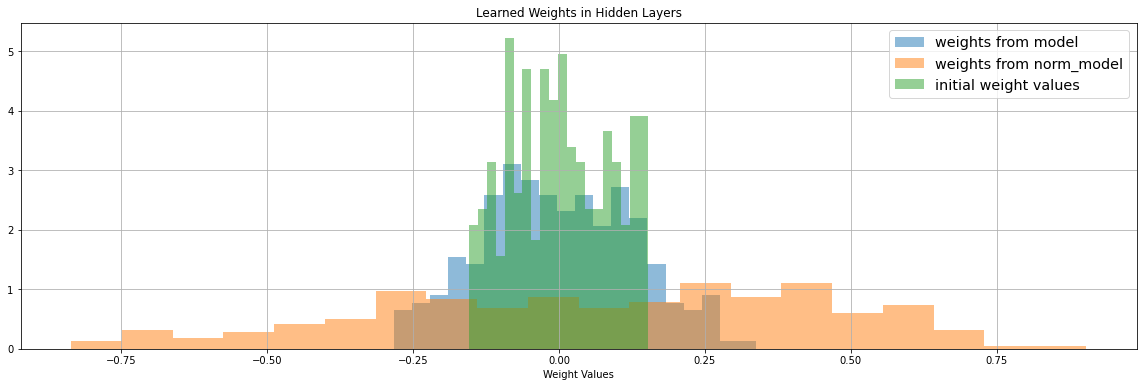

In [21]:
plt.figure(figsize=(20,6))
plt.title("Learned Weights in Hidden Layers")
plt.xlabel("Weight Values")
plt.grid()

# by setting density=True, we are transforming our plots into probability distributions 
plt.hist(weights, bins=20, alpha=0.5, label="weights from model", density=True);
plt.hist(weights_norm, bins=20, alpha=0.5, label="weights from norm_model", density=True);
plt.hist(initial_weight_values, bins=20, alpha=0.5, label="initial weight values", density=True);
plt.legend(fontsize="x-large");

### Observations

Your plot should have 3 distributions

- weights from model trained on non-normalized data
- weights from model trained on normalized data
- initial weight values sampled from a Glorot Uniform distributions 

Use the plot to answer the following questions.

**Comparing the initial weights with weights_from_model, what was the effect of not using normalized data?**

The weights are much more condensed, giving the impression that this model's overall predictability is unreliable. There will likely be many false calls.

**Comparing the initial weights with weights_from_norm_model, what was the effect of using normalized data?**

The weights are much more evenly distributed, implying a model in which the architect can be confident. They also fall under the 0-1 category that is necessary for these equations.

**Using your understand of how Gradient Descent works, why do you think that the distributions between weights_from_model and weights_from_norm_model look so different?**

Because the normalized dataset is smaller, the coefficients are closer together, supplying reliability the first model could not.

----

# Additional Experiments

The previous experiment demonstrated the importance of normalizing our data in order to maximize model accuracy. In the next few experiments, we are going to explore the effect that certain values for Batch Size, Learning Rate, and different Optimizers have on model accuracy. 

Using our **create_model** model building function, conduct the following experiments. 

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [22]:
now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"Normalization-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)

exp1 = create_model(lr=.001, opt="adam")

x_mod1 = exp1.fit(X_train_scaled, y_train, 
                  validation_data=(X_test_scaled, y_test),
                  workers=-2, 
                  epochs=10, 
                  batch_size=22, 
                  verbose=1, 
                  callbacks=[tensorboard])

Epoch 1/10
3410/3410 [==============================] - 26s 7ms/step - loss: 0.8871 - accuracy: 0.7222 - val_loss: 0.5657 - val_accuracy: 0.8286
Epoch 2/10
3410/3410 [==============================] - 22s 6ms/step - loss: 0.5194 - accuracy: 0.8412 - val_loss: 0.5000 - val_accuracy: 0.8470
Epoch 3/10
3410/3410 [==============================] - 23s 7ms/step - loss: 0.4475 - accuracy: 0.8622 - val_loss: 0.4685 - val_accuracy: 0.8580
Epoch 4/10
3410/3410 [==============================] - 24s 7ms/step - loss: 0.4031 - accuracy: 0.8754 - val_loss: 0.4539 - val_accuracy: 0.8629
Epoch 5/10
3410/3410 [==============================] - 23s 7ms/step - loss: 0.3758 - accuracy: 0.8840 - val_loss: 0.4421 - val_accuracy: 0.8663
Epoch 6/10
3410/3410 [==============================] - 24s 7ms/step - loss: 0.3503 - accuracy: 0.8924 - val_loss: 0.4496 - val_accuracy: 0.8635
Epoch 7/10
3410/3410 [==============================] - 24s 7ms/step - loss: 0.3316 - accuracy: 0.8960 - val_loss: 0.4404 - val_ac

In [23]:
exp1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 250)               16250     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2510      
Total params: 69,000
Trainable params: 69,000
Non-trainable params: 0
_________________________________________________________________


In [24]:
exp2 = create_model(lr=.001, opt="adam")

x_mod2 = exp2.fit(X_train_scaled, y_train, 
                  validation_data=(X_test_scaled, y_test),
                  workers=-2, 
                  epochs=10, 
                  batch_size=26, 
                  verbose=1, 
                  callbacks=[tensorboard])

Epoch 1/10
2885/2885 [==============================] - 22s 7ms/step - loss: 0.9080 - accuracy: 0.7190 - val_loss: 0.5620 - val_accuracy: 0.8304
Epoch 2/10
2885/2885 [==============================] - 19s 7ms/step - loss: 0.5304 - accuracy: 0.8375 - val_loss: 0.5064 - val_accuracy: 0.8458
Epoch 3/10
2885/2885 [==============================] - 20s 7ms/step - loss: 0.4621 - accuracy: 0.8582 - val_loss: 0.4710 - val_accuracy: 0.8576
Epoch 4/10
2885/2885 [==============================] - 20s 7ms/step - loss: 0.4127 - accuracy: 0.8743 - val_loss: 0.4651 - val_accuracy: 0.8566
Epoch 5/10
2885/2885 [==============================] - 20s 7ms/step - loss: 0.3769 - accuracy: 0.8843 - val_loss: 0.4554 - val_accuracy: 0.8626
Epoch 6/10
2885/2885 [==============================] - 21s 7ms/step - loss: 0.3522 - accuracy: 0.8927 - val_loss: 0.4478 - val_accuracy: 0.8674
Epoch 7/10
2885/2885 [==============================] - 21s 7ms/step - loss: 0.3232 - accuracy: 0.9004 - val_loss: 0.4437 - val_ac

In [25]:
exp2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 250)               16250     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2510      
Total params: 69,000
Trainable params: 69,000
Non-trainable params: 0
_________________________________________________________________


In [26]:
exp3 = create_model(lr=.001, opt="adam")

x_mod3 = exp3.fit(X_train_scaled, y_train, 
                  validation_data=(X_test_scaled, y_test),
                  workers=-2, 
                  epochs=10, 
                  batch_size=38, 
                  verbose=1, 
                  callbacks=[tensorboard])

Epoch 1/10
1974/1974 [==============================] - 18s 9ms/step - loss: 0.9685 - accuracy: 0.7001 - val_loss: 0.5924 - val_accuracy: 0.8208
Epoch 2/10
1974/1974 [==============================] - 14s 7ms/step - loss: 0.5506 - accuracy: 0.8350 - val_loss: 0.5310 - val_accuracy: 0.8394
Epoch 3/10
1974/1974 [==============================] - 16s 8ms/step - loss: 0.4694 - accuracy: 0.8565 - val_loss: 0.4906 - val_accuracy: 0.8525
Epoch 4/10
1974/1974 [==============================] - 15s 8ms/step - loss: 0.4281 - accuracy: 0.8707 - val_loss: 0.4632 - val_accuracy: 0.8621
Epoch 5/10
1974/1974 [==============================] - 15s 8ms/step - loss: 0.3927 - accuracy: 0.8794 - val_loss: 0.4459 - val_accuracy: 0.8658
Epoch 6/10
1974/1974 [==============================] - 15s 8ms/step - loss: 0.3664 - accuracy: 0.8880 - val_loss: 0.4535 - val_accuracy: 0.8629
Epoch 7/10
1974/1974 [==============================] - 15s 8ms/step - loss: 0.3491 - accuracy: 0.8932 - val_loss: 0.4482 - val_ac

In [27]:
exp3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_16 (Dense)             (None, 250)               16250     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2510      
Total params: 69,000
Trainable params: 69,000
Non-trainable params: 0
_________________________________________________________________


In [28]:
exp4 = create_model(lr=.001, opt="adam")

x_mod4 = exp4.fit(X_train_scaled, y_train, 
                  validation_data=(X_test_scaled, y_test),
                  workers=-2, 
                  epochs=10, 
                  batch_size=48, 
                  verbose=1, 
                  callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 21s 12ms/step - loss: 0.9887 - accuracy: 0.6927 - val_loss: 0.6083 - val_accuracy: 0.8204
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5708 - accuracy: 0.8282 - val_loss: 0.5406 - val_accuracy: 0.8374
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4819 - accuracy: 0.8539 - val_loss: 0.4882 - val_accuracy: 0.8504
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.4429 - accuracy: 0.8661 - val_loss: 0.4639 - val_accuracy: 0.8608
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4115 - accuracy: 0.8747 - val_loss: 0.4607 - val_accuracy: 0.8612
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3803 - accuracy: 0.8826 - val_loss: 0.4451 - val_accuracy: 0.8670
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3609 - accuracy: 0.8900 - val_loss: 0.4412 - val_a

In [29]:
exp4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_19 (Dense)             (None, 250)               16250     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                2510      
Total params: 69,000
Trainable params: 69,000
Non-trainable params: 0
_________________________________________________________________


In [30]:
exp5 = create_model(lr=.001, opt="adam")

x_mod5 = exp5.fit(X_train_scaled, y_train, 
                  validation_data=(X_test_scaled, y_test),
                  workers=-2, 
                  epochs=10, 
                  batch_size=30, 
                  verbose=1, 
                  callbacks=[tensorboard])

Epoch 1/10
2500/2500 [==============================] - 19s 7ms/step - loss: 0.9356 - accuracy: 0.7070 - val_loss: 0.5705 - val_accuracy: 0.8251
Epoch 2/10
2500/2500 [==============================] - 17s 7ms/step - loss: 0.5489 - accuracy: 0.8317 - val_loss: 0.5039 - val_accuracy: 0.8480
Epoch 3/10
2500/2500 [==============================] - 17s 7ms/step - loss: 0.4678 - accuracy: 0.8567 - val_loss: 0.4808 - val_accuracy: 0.8555
Epoch 4/10
2500/2500 [==============================] - 17s 7ms/step - loss: 0.4280 - accuracy: 0.8673 - val_loss: 0.4592 - val_accuracy: 0.8626
Epoch 5/10
2500/2500 [==============================] - 18s 7ms/step - loss: 0.3951 - accuracy: 0.8777 - val_loss: 0.4561 - val_accuracy: 0.8631
Epoch 6/10
2500/2500 [==============================] - 17s 7ms/step - loss: 0.3583 - accuracy: 0.8905 - val_loss: 0.4543 - val_accuracy: 0.8638
Epoch 7/10
2500/2500 [==============================] - 17s 7ms/step - loss: 0.3395 - accuracy: 0.8953 - val_loss: 0.4535 - val_ac

In [31]:
exp5.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_22 (Dense)             (None, 250)               16250     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                2510      
Total params: 69,000
Trainable params: 69,000
Non-trainable params: 0
_________________________________________________________________


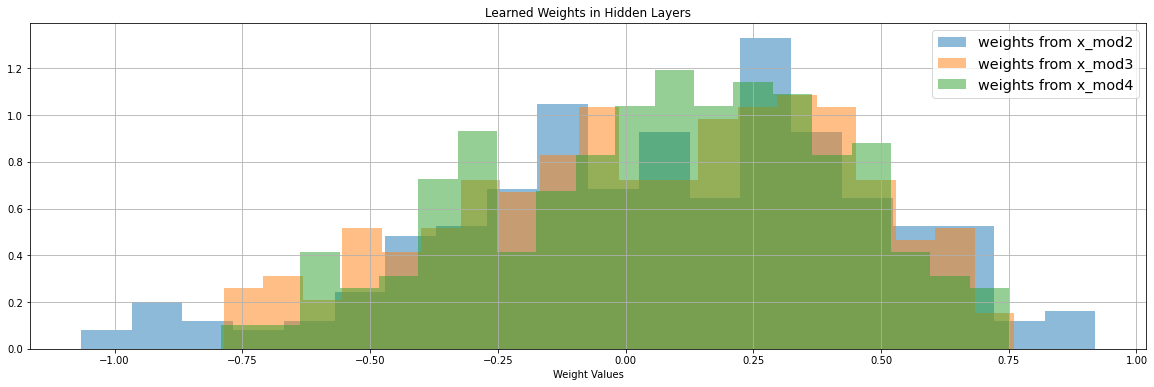

In [32]:
plt.figure(figsize=(20,6))
plt.title("Learned Weights in Hidden Layers")
plt.xlabel("Weight Values")
plt.grid()

layer3 = exp1.get_layer(name="dense_10")
bias1, weights1 = layer3.get_weights()
layer4 = exp2.get_layer(name="dense_13")
bias2, weights2 = layer4.get_weights()
layer5 = exp3.get_layer(name="dense_16")
bias3, weights3 = layer5.get_weights()
layer6 = exp4.get_layer(name="dense_19")
bias4, weights4 = layer6.get_weights()
layer5 = exp5.get_layer(name="dense_22")
bias5, weights5 = layer5.get_weights()


# plt.hist(weights1, bins=20, alpha=0.5, label="weights from x_mod1", density=True);
plt.hist(weights2, bins=20, alpha=0.5, label="weights from x_mod2", density=True);
plt.hist(weights3, bins=20, alpha=0.5, label="weights from x_mod3", density=True);
plt.hist(weights4, bins=20, alpha=0.5, label="weights from x_mod4", density=True);
# plt.hist(weights5, bins=20, alpha=0.5, label="weights from x_mod5", density=True);
plt.legend(fontsize="x-large");

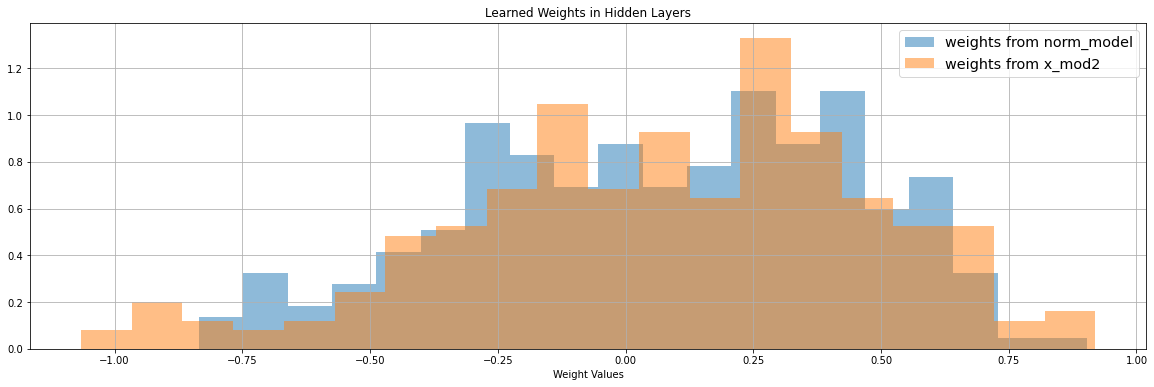

In [33]:
plt.figure(figsize=(20,6))
plt.title("Learned Weights in Hidden Layers")
plt.xlabel("Weight Values")
plt.grid()

plt.hist(weights_norm, bins=20, alpha=0.5, label="weights from norm_model", density=True);
plt.hist(weights2, bins=20, alpha=0.5, label="weights from x_mod2", density=True);
plt.legend(fontsize="x-large");

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [34]:
xlr1 = create_model(lr=.05, opt="adam")

check_lr1 = xlr1.fit(X_train_scaled, y_train, 
                  validation_data=(X_test_scaled, y_test),
                  workers=-2, 
                  epochs=10, 
                  batch_size=26, 
                  verbose=1, 
                  callbacks=[tensorboard])

Epoch 1/10
2885/2885 [==============================] - 21s 7ms/step - loss: 0.9162 - accuracy: 0.7131 - val_loss: 0.5589 - val_accuracy: 0.8311
Epoch 2/10
2885/2885 [==============================] - 19s 6ms/step - loss: 0.5280 - accuracy: 0.8377 - val_loss: 0.5029 - val_accuracy: 0.8472
Epoch 3/10
2885/2885 [==============================] - 20s 7ms/step - loss: 0.4652 - accuracy: 0.8586 - val_loss: 0.4801 - val_accuracy: 0.8562
Epoch 4/10
2885/2885 [==============================] - 20s 7ms/step - loss: 0.4151 - accuracy: 0.8730 - val_loss: 0.4538 - val_accuracy: 0.8641
Epoch 5/10
2885/2885 [==============================] - 19s 7ms/step - loss: 0.3754 - accuracy: 0.8855 - val_loss: 0.4390 - val_accuracy: 0.8679
Epoch 6/10
2885/2885 [==============================] - 20s 7ms/step - loss: 0.3524 - accuracy: 0.8921 - val_loss: 0.4514 - val_accuracy: 0.8652
Epoch 7/10
2885/2885 [==============================] - 19s 6ms/step - loss: 0.3323 - accuracy: 0.8958 - val_loss: 0.4402 - val_ac

In [35]:
xlr2 = create_model(lr=.085, opt="adam")

check_lr2 = xlr2.fit(X_train_scaled, y_train, 
                  validation_data=(X_test_scaled, y_test),
                  workers=-2, 
                  epochs=10, 
                  batch_size=26, 
                  verbose=1, 
                  callbacks=[tensorboard])

Epoch 1/10
2885/2885 [==============================] - 23s 7ms/step - loss: 0.9079 - accuracy: 0.7155 - val_loss: 0.5731 - val_accuracy: 0.8259
Epoch 2/10
2885/2885 [==============================] - 20s 7ms/step - loss: 0.5270 - accuracy: 0.8399 - val_loss: 0.4926 - val_accuracy: 0.8510
Epoch 3/10
2885/2885 [==============================] - 20s 7ms/step - loss: 0.4591 - accuracy: 0.8589 - val_loss: 0.4638 - val_accuracy: 0.8598
Epoch 4/10
2885/2885 [==============================] - 19s 7ms/step - loss: 0.4060 - accuracy: 0.8759 - val_loss: 0.4643 - val_accuracy: 0.8596
Epoch 5/10
2885/2885 [==============================] - 20s 7ms/step - loss: 0.3775 - accuracy: 0.8828 - val_loss: 0.4452 - val_accuracy: 0.8674
Epoch 6/10
2885/2885 [==============================] - 19s 6ms/step - loss: 0.3602 - accuracy: 0.8898 - val_loss: 0.4379 - val_accuracy: 0.8709
Epoch 7/10
2885/2885 [==============================] - 19s 7ms/step - loss: 0.3385 - accuracy: 0.8950 - val_loss: 0.4445 - val_ac

In [36]:
xlr3 = create_model(lr=.03, opt="adam")

check_lr3 = xlr3.fit(X_train_scaled, y_train, 
                  validation_data=(X_test_scaled, y_test),
                  workers=-2, 
                  epochs=10, 
                  batch_size=26, 
                  verbose=1, 
                  callbacks=[tensorboard])

Epoch 1/10
2885/2885 [==============================] - 22s 7ms/step - loss: 0.9273 - accuracy: 0.7072 - val_loss: 0.5651 - val_accuracy: 0.8299
Epoch 2/10
2885/2885 [==============================] - 19s 6ms/step - loss: 0.5279 - accuracy: 0.8396 - val_loss: 0.4900 - val_accuracy: 0.8530
Epoch 3/10
2885/2885 [==============================] - 19s 7ms/step - loss: 0.4514 - accuracy: 0.8619 - val_loss: 0.4779 - val_accuracy: 0.8557
Epoch 4/10
2885/2885 [==============================] - 19s 6ms/step - loss: 0.4082 - accuracy: 0.8757 - val_loss: 0.4503 - val_accuracy: 0.8660
Epoch 5/10
2885/2885 [==============================] - 20s 7ms/step - loss: 0.3747 - accuracy: 0.8854 - val_loss: 0.4454 - val_accuracy: 0.8690
Epoch 6/10
2885/2885 [==============================] - 19s 7ms/step - loss: 0.3548 - accuracy: 0.8908 - val_loss: 0.4501 - val_accuracy: 0.8668
Epoch 7/10
2885/2885 [==============================] - 19s 7ms/step - loss: 0.3248 - accuracy: 0.9002 - val_loss: 0.4457 - val_ac

In [37]:
xlr4 = create_model(lr=.005, opt="adam")

check_lr4 = xlr4.fit(X_train_scaled, y_train, 
                  validation_data=(X_test_scaled, y_test),
                  workers=-2, 
                  epochs=10, 
                  batch_size=26, 
                  verbose=1, 
                  callbacks=[tensorboard])

Epoch 1/10
2885/2885 [==============================] - 22s 7ms/step - loss: 0.9199 - accuracy: 0.7050 - val_loss: 0.5681 - val_accuracy: 0.8274
Epoch 2/10
2885/2885 [==============================] - 19s 7ms/step - loss: 0.5363 - accuracy: 0.8361 - val_loss: 0.5169 - val_accuracy: 0.8423
Epoch 3/10
2885/2885 [==============================] - 19s 6ms/step - loss: 0.4535 - accuracy: 0.8599 - val_loss: 0.4697 - val_accuracy: 0.8575
Epoch 4/10
2885/2885 [==============================] - 19s 7ms/step - loss: 0.4159 - accuracy: 0.8725 - val_loss: 0.4595 - val_accuracy: 0.8616
Epoch 5/10
2885/2885 [==============================] - 18s 6ms/step - loss: 0.3783 - accuracy: 0.8838 - val_loss: 0.4425 - val_accuracy: 0.8673
Epoch 6/10
2885/2885 [==============================] - 19s 6ms/step - loss: 0.3532 - accuracy: 0.8901 - val_loss: 0.4508 - val_accuracy: 0.8653
Epoch 7/10
2885/2885 [==============================] - 19s 7ms/step - loss: 0.3337 - accuracy: 0.8951 - val_loss: 0.4500 - val_ac

In [38]:
xlr5 = create_model(lr=.0001, opt="adam")

check_lr5 = xlr5.fit(X_train_scaled, y_train, 
                  validation_data=(X_test_scaled, y_test),
                  workers=-2, 
                  epochs=10, 
                  batch_size=26, 
                  verbose=1, 
                  callbacks=[tensorboard])

Epoch 1/10
2885/2885 [==============================] - 21s 7ms/step - loss: 0.9237 - accuracy: 0.7113 - val_loss: 0.5759 - val_accuracy: 0.8241
Epoch 2/10
2885/2885 [==============================] - 19s 6ms/step - loss: 0.5442 - accuracy: 0.8331 - val_loss: 0.4980 - val_accuracy: 0.8485
Epoch 3/10
2885/2885 [==============================] - 19s 7ms/step - loss: 0.4599 - accuracy: 0.8578 - val_loss: 0.4849 - val_accuracy: 0.8524
Epoch 4/10
2885/2885 [==============================] - 19s 7ms/step - loss: 0.4148 - accuracy: 0.8730 - val_loss: 0.4526 - val_accuracy: 0.8622
Epoch 5/10
2885/2885 [==============================] - 20s 7ms/step - loss: 0.3809 - accuracy: 0.8829 - val_loss: 0.4368 - val_accuracy: 0.8690
Epoch 6/10
2885/2885 [==============================] - 19s 6ms/step - loss: 0.3570 - accuracy: 0.8906 - val_loss: 0.4591 - val_accuracy: 0.8659
Epoch 7/10
2885/2885 [==============================] - 20s 7ms/step - loss: 0.3356 - accuracy: 0.8981 - val_loss: 0.4438 - val_ac

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [39]:
def new_model(lr=.01, opt="adam"):
    """
    
    Build and returns a complies Keras model.  
    
    Parameters
    ----------
    lr: float
        Learing rate parameter used for Stocastic Gradient Descent 
        
    opt: string
        Name of optimizer to use
        
    Returns
    -------
    model: keras object 
        A complied keras model 
    """
    
    model = Sequential([
        Dense(64, activation="relu"),
        Dense(250, input_dim=784, activation="sigmoid"),
        Dense(10, activation="softmax")
    ])
    
    model.compile(
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    return model

x_opt1 = new_model(lr=.03, opt="adamax")

opti1 = x_opt1.fit(X_train_scaled, y_train, 
                  validation_data=(X_test_scaled, y_test),
                  workers=-2, 
                  epochs=10, 
                  batch_size=26, 
                  verbose=1, 
                  callbacks=[tensorboard])

Epoch 1/10
2885/2885 [==============================] - 24s 8ms/step - loss: 0.9103 - accuracy: 0.7152 - val_loss: 0.5841 - val_accuracy: 0.8248
Epoch 2/10
2885/2885 [==============================] - 22s 8ms/step - loss: 0.5408 - accuracy: 0.8335 - val_loss: 0.5122 - val_accuracy: 0.8461
Epoch 3/10
2885/2885 [==============================] - 19s 7ms/step - loss: 0.4819 - accuracy: 0.8543 - val_loss: 0.4988 - val_accuracy: 0.8540
Epoch 4/10
2885/2885 [==============================] - 18s 6ms/step - loss: 0.4471 - accuracy: 0.8662 - val_loss: 0.4923 - val_accuracy: 0.8580
Epoch 5/10
2885/2885 [==============================] - 18s 6ms/step - loss: 0.4227 - accuracy: 0.8731 - val_loss: 0.4996 - val_accuracy: 0.8577
Epoch 6/10
2885/2885 [==============================] - 18s 6ms/step - loss: 0.4070 - accuracy: 0.8769 - val_loss: 0.4987 - val_accuracy: 0.8610
Epoch 7/10
2885/2885 [==============================] - 18s 6ms/step - loss: 0.3862 - accuracy: 0.8858 - val_loss: 0.5143 - val_ac

------

## Stretch Goals: 

- On the learning rate experiments, implement [EarlyStopping](https://keras.io/api/callbacks/early_stopping/)
- Review the math of Gradient Descent. 

In [40]:
!rm -rf ./logs/